In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from nltk.corpus import stopwords
import nltk
from tqdm.notebook import tqdm ,tnrange

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import tensorflow as tf
import transformers

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [2]:
df = pd.read_csv('Train.csv')
tags = pd.read_csv("Tags.csv")

In [3]:
df.head(5)

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
tags.head(5)

,Tags
0,Analysis of PDEs
1,Applications
2,Artificial Intelligence
3,Astrophysics of Galaxies
4,Computation and Language


In [5]:
tags.shape, df.shape

((25, 1), (14004, 31))

In [6]:
df.columns

Index(['id', 'ABSTRACT', 'Computer Science', 'Mathematics', 'Physics',
       'Statistics', 'Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')

In [7]:
X_1 = df['ABSTRACT']
X_2 = df.iloc[:, 2: 6]
y = df.iloc[:, 6: 6 + 25]


In [8]:
for col in df.columns:
    if any(df[col].isnull()):
        print(df[col].value_counts(dropna=False))

In [9]:
np.min(df['ABSTRACT'].str.len()), np.max(df['ABSTRACT'].str.len())

(54, 4551)

Text(0.5, 1.0, '1s for departments')

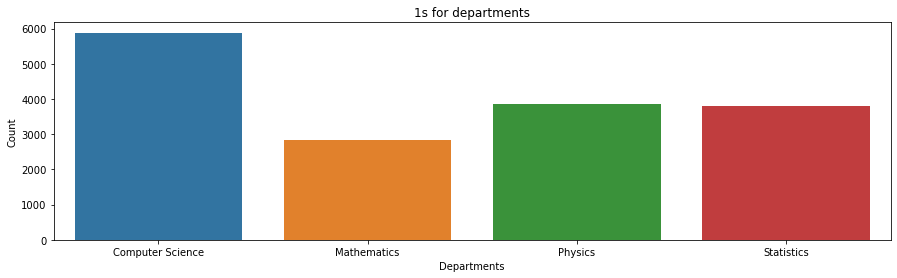

In [10]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("Departments")
plt.ylabel("Count")
sns.barplot([col for col in X_2.columns], [X_2[X_2[col] == 1].shape[0] for col in X_2.columns], ax=ax).set_title("1s for departments")


Text(0.5, 1.0, '0s for departments')

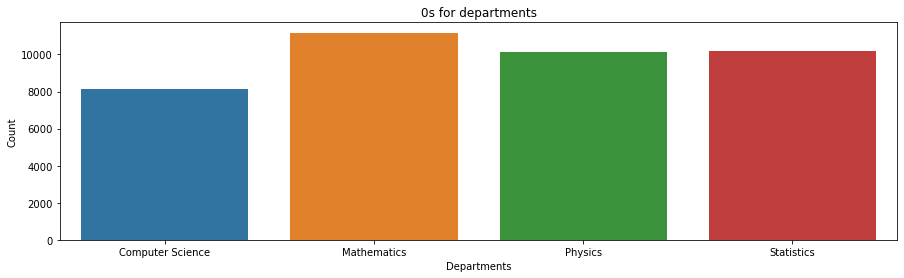

In [11]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("Departments")
plt.ylabel("Count")
sns.barplot([col for col in X_2.columns], [X_2[X_2[col] == 0].shape[0] for col in X_2.columns], ax=ax).set_title("0s for departments")


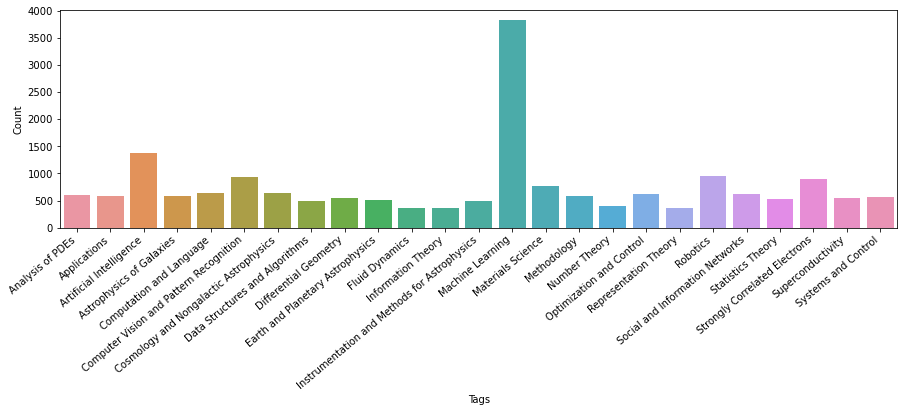

In [12]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)

plt.xlabel("Tags")
plt.ylabel("Count")
a = sns.barplot([col for col in y.columns], [y[y[col] == 1].shape[0] for col in y.columns], ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha='right')
# plt.tight_layout()
plt.show()


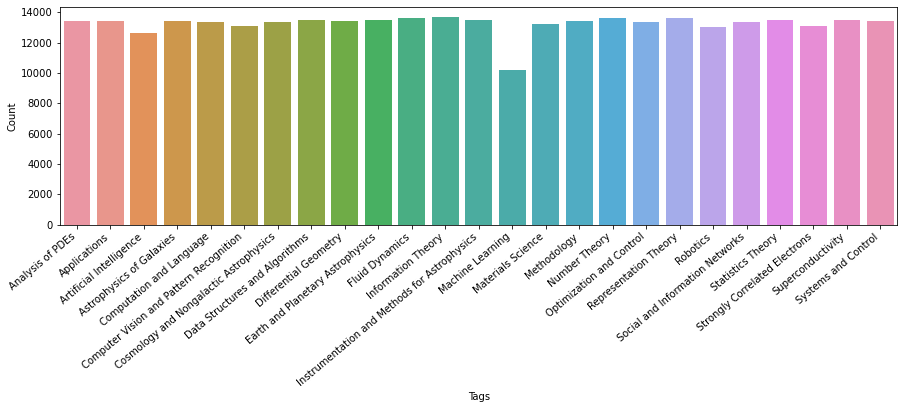

In [13]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)

plt.xlabel("Tags")
plt.ylabel("Count")
a = sns.barplot([col for col in y.columns], [y[y[col] == 0].shape[0] for col in y.columns], ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha='right')
# plt.tight_layout()
plt.show()


In [14]:
for i, j in zip([y[y[col] == 0].shape[0] for col in y.columns], [y[y[col] == 1].shape[0] for col in y.columns]):
    assert i + j == 14004

for i,j in zip([X_2[X_2[col] == 1].shape[0] for col in X_2.columns], [X_2[X_2[col] == 0].shape[0] for col in X_2.columns]):
    assert i + j == 14004

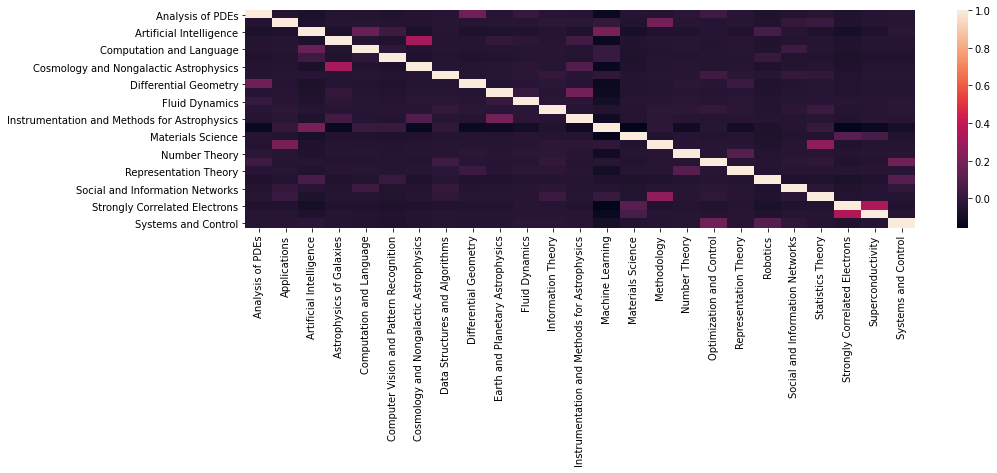

In [15]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(y.corr(), ax=ax)

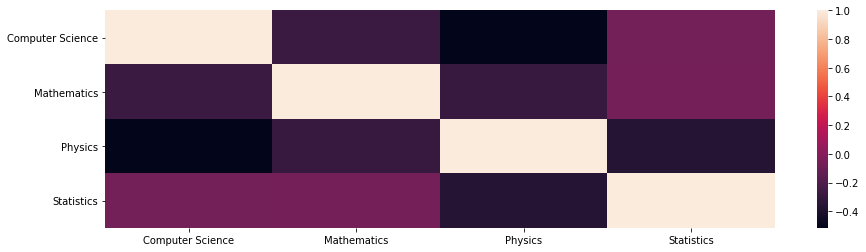

In [16]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(X_2.corr(), ax=ax)

In [17]:
y.columns == tags.Tags.values.tolist()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])